In [1]:
!pip install faker
from faker import Faker
import random
import numpy as np
import pandas as pd
print (pd.options.display.max_rows)
from datetime import datetime

60


In [ ]:
def create_fake_data(filename='data.csv', rows=100):
    f = Faker()
    
    today = datetime.today()
    year = today.year
    
    def get_birth_year():
        age = int(np.random.normal(1970, 30, 1)[0])
        if age > 2005:
            return 2005
        elif age < 110:
            return 100
        
        return age
    
    def get_text(length=300):
        return length * 'adfafdad;lfkajdk;lfjadlfkjad;lfafadsfljadsklfjelfjdf;oeureoifjaa;ldfja;dlfjefjadlfjadl;fjeiofjadlja;lfjeofieuoifjadlfjad;lfjad;lfjad;lfje;fjadl;fkjeuroiewuflsdjfa;dlsjvdfsdfjadlsfjewioufalidjfaldfkj3riusfuasdjfa;djfasdlfjkldsjfa;ldsfj;adslfjkdas;fjlas,vjddsajfskjdflkajfkladjfalk;fjeoiuroadjvdzvnklvjdlfjadslfjioer8urfjadfajd;fjadfa';
        
    
    with open(filename, 'w') as file:
        for i in range(1, rows+1):
            name = f.first_name()
            lastname = f.last_name()
            birthyear = get_birth_year()
            age = year - birthyear
#             credit_card = f.credit_card()
            job = f.job().replace(',', '-')
            ssn = f.ssn()
            some_data = get_text()

            row = f'{name},{lastname},{birthyear},{age},{job},{ssn},{some_data}\n'
            file.write(row)
            
            if i % 10000 == 0 or i == rows:
                print(i, '/', rows)
                

In [ ]:
create_fake_data(rows=10)
# create_fake_data(rows=1000000)

In [ ]:
# !ls

In [ ]:
!head -n 5 data.csv

In [ ]:
df = pd.read_csv('data.csv', header=None)

In [ ]:
df

In [ ]:
create_fake_data(filename='data_big.csv', rows=100000)

In [2]:
df = []

for chunk in pd.read_csv("data_big.csv", chunksize = 100000):
    chunk = chunk.iloc[:, 3:5]
    df.append(chunk)
    chunk.to_csv('Age_Occupation.csv', mode = 'a', header = False, index = False)

In [3]:
print(df)

[        16   Forest/woodland manager
0       33  Technical sales engineer
1       49    Conservator- furniture
2       70         Minerals surveyor
3       80       Programmer- systems
4       42      Broadcast journalist
...    ...                       ...
99994   16     Nutritional therapist
99995   20              Geoscientist
99996  134   Diagnostic radiographer
99997   23               Proofreader
99998   70  Horticultural consultant

[99999 rows x 2 columns]]


In [17]:
df = pd.read_csv('Age_Occupation.csv', header=None)
df.columns = ["Age", "Occupation"]
df

,Age,Occupation
0,33,Technical sales engineer
1,49,Conservator- furniture
2,70,Minerals surveyor
3,80,Programmer- systems
4,42,Broadcast journalist
...,...,...
99994,16,Nutritional therapist
99995,20,Geoscientist
99996,134,Diagnostic radiographer
99997,23,Proofreader


array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

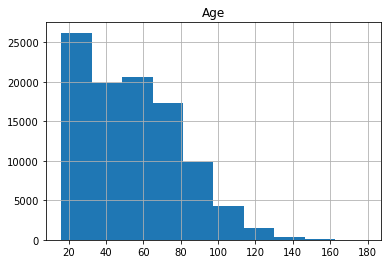

In [18]:
df.hist(column = "Age")

In [20]:
occupation_count = df["Occupation"].value_counts()
occupation_count[0:20]
#df = pd.DataFrame(occupation_count)
#df


Teacher- secondary school                 200
Designer- ceramics/pottery                191
Engineer- communications                  189
Ambulance person                          189
Futures trader                            189
Administrator- Civil Service              188
Engineer- agricultural                    187
Archivist                                 186
Stage manager                             185
Leisure centre manager                    185
Passenger transport manager               184
Quantity surveyor                         184
Radio producer                            184
Medical sales representative              183
Hydrologist                               183
Scientist- product/process development    183
Charity fundraiser                        182
Retail banker                             181
Environmental consultant                  181
Ceramics designer                         180
Name: Occupation, dtype: int64